In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [ ]:
tf.__version__

'1.15.2'

In [ ]:
random_state = 123
def reset_graph(seed=random_state):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [ ]:
def logistic_regression(X, y, initializer = None, learning_rate = 0.009):
  n_inputs = int(X.get_shape()[1])
  print(X.get_shape())
  print(n_inputs)
  with tf.name_scope("logistic_regression"):
    with tf.name_scope("model"):
      if initializer is None:
        initializer = tf.random_uniform([n_inputs,1], -1.0, 1.0)
      theta = tf.Variable(initializer, name="theta")
      logits = tf.matmul(X, theta, name = "logits")
      y_proba = tf.sigmoid(logits)
    with tf.name_scope("train"):
      loss = tf.losses.log_loss(y, y_proba)
      optimizer = tf.train.GradientDescentOptimizer(learning_rate)
      training_op = optimizer.minimize(loss)
      loss_summary = tf.summary.scalar('log_loss', loss)
    with tf.name_scope("init"):
      init = tf.global_variables_initializer()
    with tf.name_scope("saver"):
      model_saver = tf.train.Saver()
  return y_proba, loss, training_op, loss_summary, init, model_saver

In [ ]:
from sklearn.datasets import make_moons

m = 5000
test_ratio = 0.2
test_size = int(m*test_ratio)

X_moons, y_moons = make_moons(m, noise=0.1, random_state=random_state)

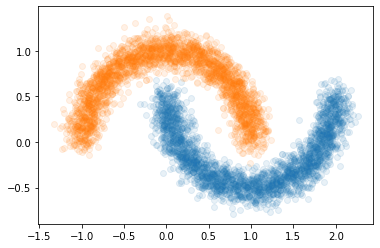

In [ ]:
plt.scatter(X_moons[y_moons == 1,0], X_moons[y_moons == 1,1], alpha=0.1)
plt.scatter(X_moons[y_moons == 0,0], X_moons[y_moons == 0, 1], alpha=0.1)

In [ ]:
X_moons_with_bias = np.c_[np.ones((m,1)), X_moons]
y_moons = y_moons.reshape(-1,1)

In [ ]:
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons[:-test_size]
y_test = y_moons[-test_size:]

In [ ]:
def random_batch(X,y, batch_size):
  random_indices = np.random.randint(0,len(y), batch_size)
  return X[random_indices], y[random_indices]

In [ ]:
n_inputs = 2
reset_graph()
X = tf.placeholder(tf.float32, shape = (None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape = (None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, model_saver = logistic_regression(X, y);

(?, 3)
3


In [ ]:
n_epochs = 5000
batch_size = 200
n_batches = int(np.ceil(m/batch_size))
with tf.Session() as session:
  session.run(init)

  for epoch in range(n_epochs):
    for batch in range(n_batches):
      X_batch, y_batch = random_batch(X_train, y_train, batch_size)
      session.run(training_op, feed_dict={X:X_batch, y:y_batch})

    if epoch % 500 == 0:
      print(loss.eval(feed_dict={X:X_test, y:y_test}))

0.59871995
0.2605824
0.25456768
0.25393042
0.25388637
0.25421336
0.2542888
0.25437462
0.25444877
0.25447628
